# 🧠 Klasifikasi Gambar Tumor Otak dengan CNN

## Tujuan Pembelajaran
Memahami konsep Convolutional Neural Network (CNN) untuk klasifikasi tumor otak berdasarkan gambar MRI.

## Download Dataset

In [1]:
import kagglehub
tumor_otak_path = kagglehub.dataset_download('navoneel/brain-mri-images-for-brain-tumor-detection')

print('Data source import complete.')

Data source import complete.


### **Insight:**

> Download dataset berisi gambar MRI otak dari Kaggle. Dataset ini memiliki dua kelas, yaitu:
- Yes -> gambar dengan tumor
- No -> gambar tanpa tumor

## Import Library

In [2]:
# Import Library
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

### **Insight:**

> Library yang akan digunakan dalam projek ini adalah sebagai berikut:
- PIL -> memproses gambar
- NumPy -> manipulasi array
- TensorFlow -> membangun dan melatih model CNN
- Sequential -> membuat model CNN berlapis (layer by layer)
- Dense -> layer fully connected yang digunakan untuk klasifikasi akhir
- Conv2D -> layer konvolusi 2D untuk mengekstrak fitur dari gambar
- MaxPooling2D -> layer untuk mengurangi dimensi gambar (downsampling)
- Flatten -> mengubah array multidimensi menjadi 1 dimensi sebelum masuk ke layer Dense
- Dropout -> layer regulasi untuk menghindari overfitting dengan mengabaikan neuron secara acak saat training
- cv2 -> OpenCV atau library tambahan untuk manipulasi gambar
- Matplotlib.pyplot -> visualisasi gambar serta membuat grafik akurasi dan loss dari proses training

## Import Dataset

In [3]:
# Fungsi untuk Load Gambar
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        img = Image.open(os.path.join(directory, filename))
        img = img.resize((224, 224))
        img = img.convert('RGB')
        img = np.array(img) / 255.0
        images.append(img)
    return images

In [4]:
# Load dataset
tumor_images = load_images('/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes')
no_tumor_images = load_images('/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no')

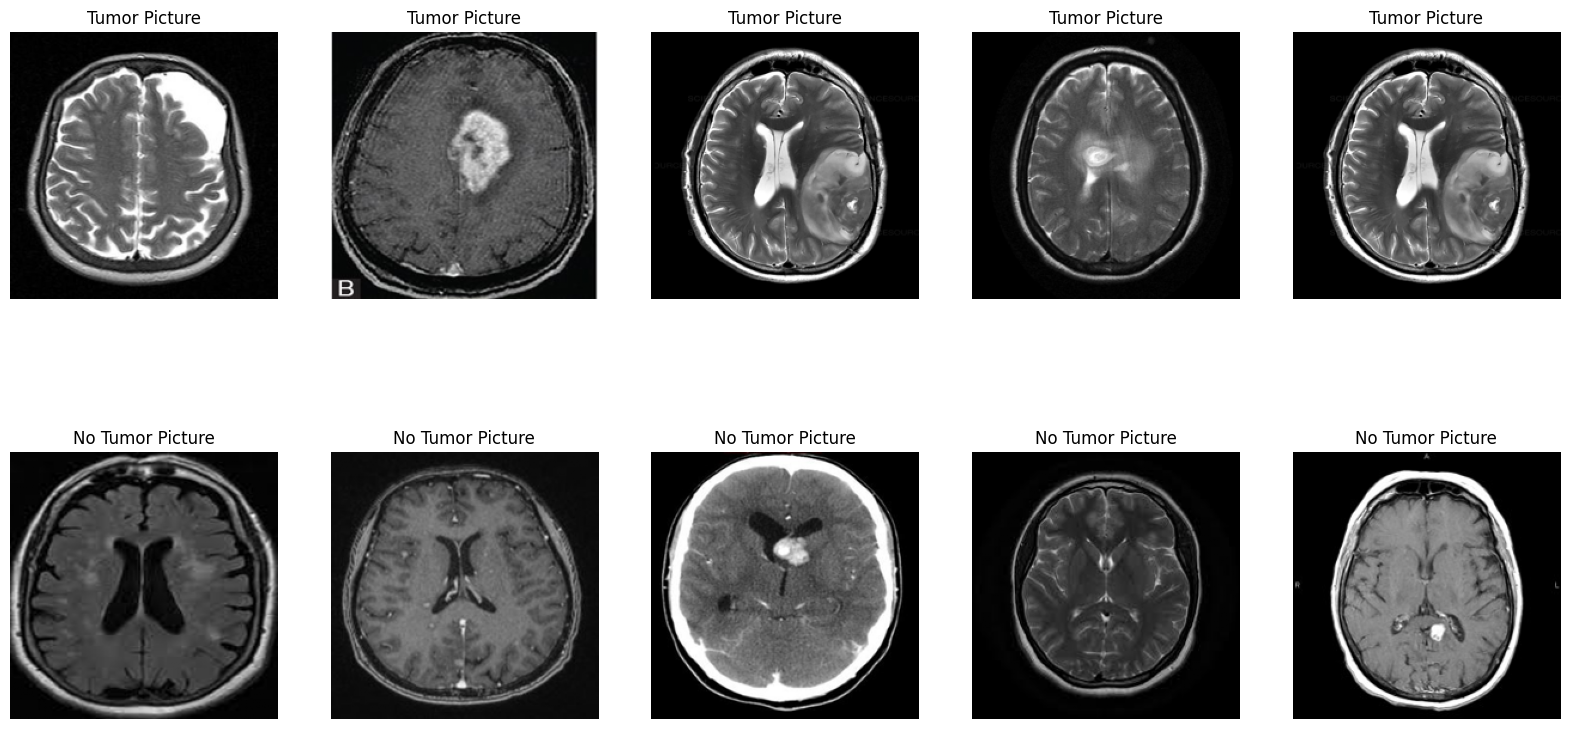

In [5]:
# Visualisasi gambar
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(5):
    axes[0, i].imshow(tumor_images[i])
    axes[0, i].set_title('Tumor Picture')
    axes[0, i].axis('off')

for i in range(5):
    axes[1, i].imshow(no_tumor_images[i])
    axes[1, i].set_title('No Tumor Picture')
    axes[1, i].axis('off')

plt.show()

In [6]:
len(tumor_images)

155

In [7]:
len(no_tumor_images)

98

In [8]:
tumor_images

[array([[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],
 
        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.00784314, 0.00784314, 0.00784

### **Insight:**

> Pada bagian ini, dataset yang telah di-download akan ditampilkan dan diubah ukurannya menjadi 224x224 piksel, serta dikonversi ke format RGB dan dinormalisasi agar nilainya ada di rentang 0-1. Hal ini dilakukan supaya data siap digunakan oleh CNN.

> Contoh gambar ditampilkan sebagai visualisasi gambar apa yang berada di dataset ini sebelum diproses. Dari dua kelas yang ada, gambar terbagi menjadi 155 gambar untuk kelas `Yes` (gambar dengan tumor) dan 98 gambar untuk kelas `No` (gambar tanpa tumor).

## Labeling

In [9]:
def assign_labels(tumor_images, no_tumor_images):
    tumor_labels = np.ones(len(tumor_images))
    no_tumor_labels = np.zeros(len(no_tumor_images))
    return tumor_labels, no_tumor_labels
tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [10]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [11]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

In [13]:
data

[array([[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],
 
        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.00784314, 0.00784314, 0.00784

In [14]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
data[0].shape

(224, 224, 3)

### **Insight:**

> Setelah itu, setiap gambar diberi label supaya mesin lebih mudah mengidentifikasi setiap gambarnya. Labeling tersebut, yakni:
- 1 untuk gambar dengan tumor
- 0 untuk gambar tanpa tumor

> Kemudian semuanya digabung menjadi satu dataset dan satu array label yang berguna untuk menjadi input dan target untuk model nanti.

> `data[0].shape` digunakan untuk melihat bahwa seluruh dataset sudah diresize menjadi 244x244 piksel dan memiliki 3 channel warna, yaitu RGB.

## Split Data

In [16]:
X = np.array(data)
y = np.array(labels)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

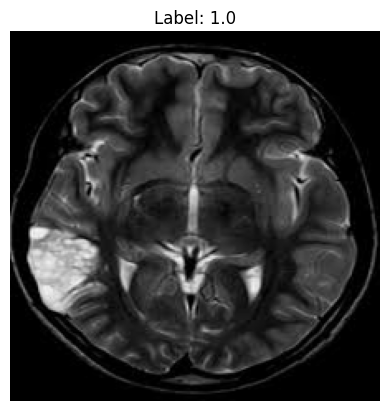

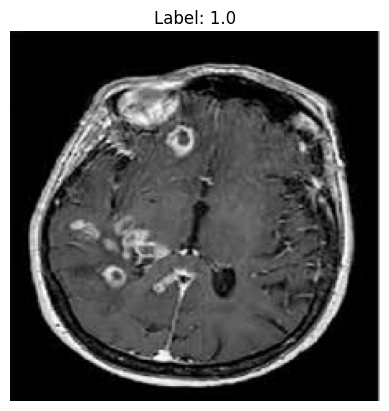

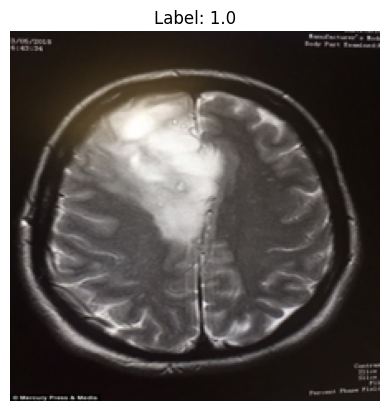

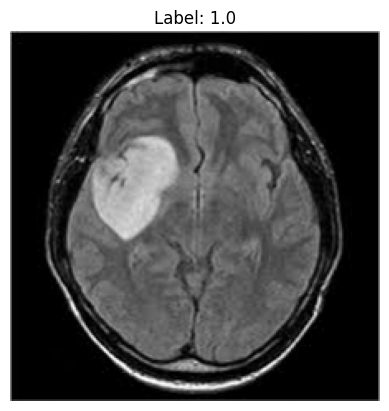

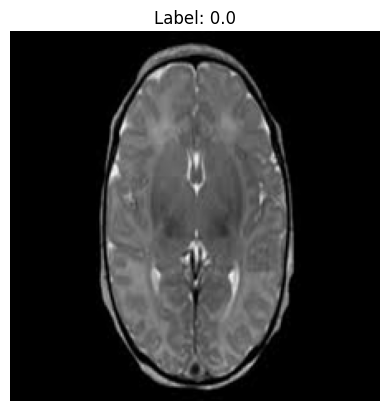

In [18]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

for image, label in train.take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.title('Label: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

### **Insight:**

> Dataset kemudian dibagi menjadi menjadi dua bagian dengan menggunakan fungsi `train_test_split()`, yaitu:
- 80% untuk pelatihan (train)
- 20% untuk pengujian (test)

> Lalu, `random_state=42` digunakan agar pembagian dataset tetap konsisten setiap kali kode dijalankan. Dengan `from_tensor_slices`, kita menyatukan gambar dan labelnya menjadi pasangan (image, label) agar bisa langsung digunakan oleh model.

## Training Model

In [19]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [20]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

### **Insight:**

> Dari data training yang ada, kita mengambil sebagian kecil (10%) untuk digunakan sebagai validaton set. Hal ini berguna untuk memantai performa model saat pelatihan berlangsung sehingga diketahui apabila model mengalami overfitting atau tidak.

> Data juga dibagi ke dalam 32 batch supaya proses training berjalan dengan lebih efisien dan stabil.

### Arsitektur Model CNN

**Struktur Model**

| Layer Type        | Fungsi                                                                | Contoh Parameter                |
| ----------------- | --------------------------------------------------------------------- | ------------------------------- |
| 🔵 Input Layer    | Menerima gambar input ukuran 224x224 piksel RGB                       | `input_shape=(224, 224, 3)`     |
| 🌀 Conv2D         | Mengekstraksi fitur visual dari gambar menggunakan filter konvolusi   | `filters=32, kernel_size=(3,3)` |
| ⚡ ReLU Activation | Aktivasi non-linear agar model bisa belajar fitur kompleks            | `activation='relu'`             |
| 🔽 MaxPooling2D   | Mengurangi dimensi spasial dan komputasi                              | `pool_size=(2,2)`               |
| 🧩 Flatten        | Mengubah hasil layer konvolusi menjadi vektor 1 dimensi               | -                               |
| 🔗 Dense          | Fully connected layer untuk belajar representasi dari fitur gambar    | `units=256, activation='relu'`  |
| 🧯 Dropout        | Mencegah overfitting dengan menonaktifkan sebagian neuron secara acak | `rate=0.5`                      |
| 🎯 Output Layer   | Menghasilkan probabilitas kelas (0 = no tumor, 1 = tumor)             | `units=1, activation='sigmoid'` |

In [21]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 394272)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │   100,933,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,935,041 (385.04 MB)

 Trainable params: 100,935,041 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train, validation_data = val, epochs = 10, verbose = 1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6234 - loss: 13.2840 - val_accuracy: 0.7000 - val_loss: 0.8586
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.6557 - loss: 6.1519 - val_accuracy: 0.9000 - val_loss: 1.3506
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.7898 - loss: 1.2529 - val_accuracy: 0.6500 - val_loss: 0.5328
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7220 - loss: 1.0551 - val_accuracy: 0.9000 - val_loss: 0.2674
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.7801 - loss: 0.5015 - val_accuracy: 1.0000 - val_loss: 0.1646
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.8875 - loss: 0.2917 - val_accuracy: 0.9500 - val_loss: 0.0864
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9282 - loss: 0.1687 - val_accuracy: 1.0000 - val_loss: 0.1060
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9634 - loss: 0.1196 - val_accuracy: 1.0000 - val_loss: 0.0411
Epoch 9

In [23]:
evaluation = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 0.8799 - loss: 0.6261


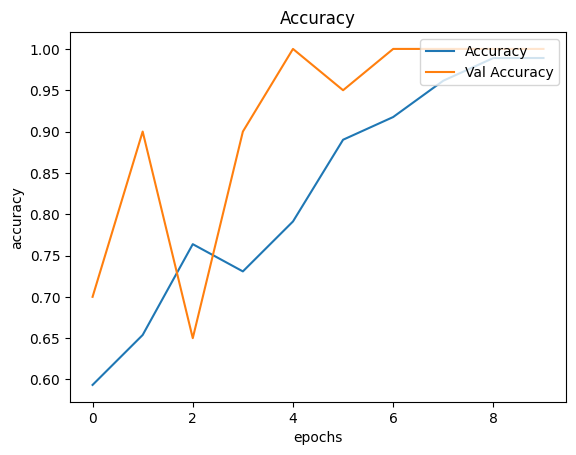

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy' , 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

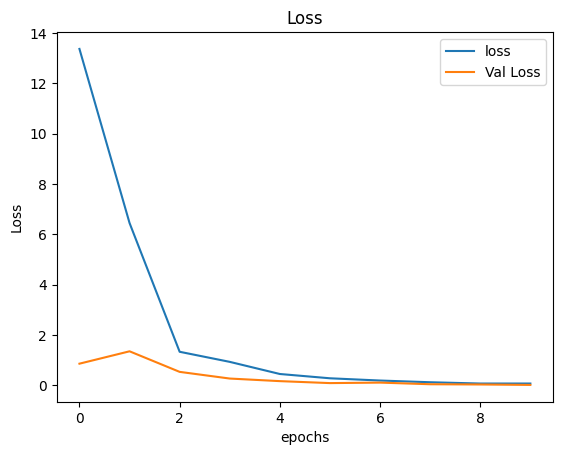

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [26]:
model.save("/tumor_otak.h5")

### **Insight:**

> Model di-compile dengan menggunakan `Adam` optimizer, `binary_crossentropy` untuk loss function (karena ini merupakan klasifikasi biner), dan `accuracy` untuk metriksnya.

> Setelah itu, model dilatih selama 10 epoch menggunakan data training dan validasi. Model kemudian diuji performanya terhadap data testing yang belum pernah dilihat sebelumnya. Evaluasi tersebut menghasilkan akurasi sebesar 88% dan lossnya sebesar 63%.

> Berdasarkan visualisasi grafik akurasi dan loss, dapat dilihat bahwa
- Akurasi model meningkat secara bertahap. Hal ini berarti model belajar dengan baik, baik dari data yang ada maupun yang belum pernah dilihat.
- Loss model meengalami penurunan dan cenderung stabil setelah beberapa epoch. Hal ini menunjukkan proses pelatihan berjalan dengan baik. Validation loss yang rendah dan mendekati training loss juga menunjukkan generalisasi model cukup baik.

## Test Model

In [27]:
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Tumor detected"
    else:
        return "No tumor detected"

Saving image6.png to image6.png


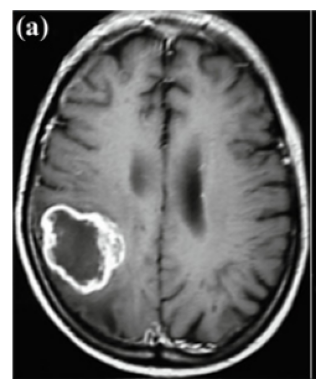

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Tumor detected


In [29]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)

### **Insight:**

> Bagian terakhir ini adalah bagian pengujian model dengan gambar yang diinput oleh pengguna. Gambar tersebut kemudian diproses dan diprediksi menggunakan model yang telah kita buat sebelumnya. Lalu hasil prediksi ditampilkan.

> Pada gambar MRI otak yang diupload, hasil prediksinya adalah ada tumor yang terdeteksi oleh model, sehingga gambar ini masuk ke kategori gambar dengan tumor. Hal ini menunjukkan bahwa model berhasil mengidentifikasi gambar baru dengan baik sesuai dengan kelasnya.

## Kesimpulan

> Model CNN yang dibangun untuk klasifikasi gambar MRI otak dengan atau tanpa tumor ini telah menunjukkan performa yang cukup baik, dengan akurasi evaluasi mencapai sekitar 88% dan grafik training yang stabil (akurasi naik, loss turun).

> Selain itu, didapatkan kesimpulan bahwa:
- Model berhasil membedakan dua kelas dengan baik pada dataset yang relatif kecil.
- Akurasi validasi cepat naik dan stabil, menunjukkan generalisasi yang baik.
- Grafik loss dan akurasi menunjukkan tidak adanya overfitting.